# Assignment 3 — Part 1: Dataset Exploration

Abhinav Kumar
11/2/2025

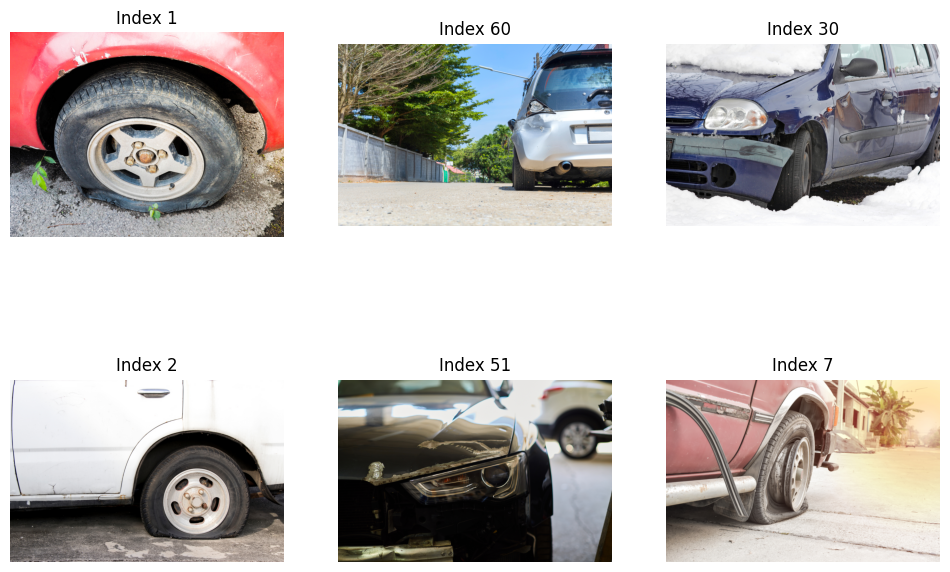

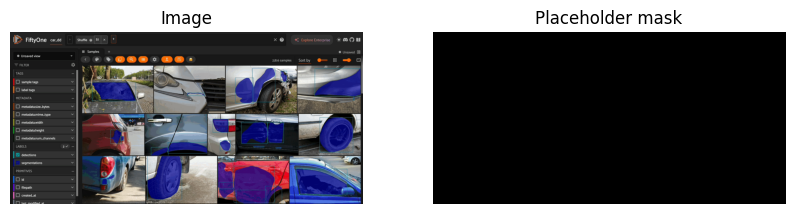

In [7]:
import itertools, random
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

ds_stream = load_dataset("harpreetsahota/CarDD", streaming=True)
key = "train" if "train" in ds_stream else list(ds_stream.keys())[0]

subset = []
for ex in itertools.islice(iter(ds_stream[key]), 64):
    img = ex["image"]
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)
    subset.append({"image": img})

def show_grid(data, n=6):
    idxs = random.sample(range(len(data)), k=min(n, len(data)))
    cols = 3
    rows = (len(idxs) + cols - 1) // cols
    plt.figure(figsize=(12, 4 * rows))
    for i, idx in enumerate(idxs, 1):
        img = data[idx]["image"]
        plt.subplot(rows, cols, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Index {idx}")
    plt.show()

show_grid(subset, n=6)

def make_placeholder_mask(pil_image):
    w, h = pil_image.size
    return np.zeros((h, w), dtype=np.uint8)

img = subset[0]["image"]
m = make_placeholder_mask(img)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1); plt.imshow(img); plt.axis("off"); plt.title("Image")
plt.subplot(1,2,2); plt.imshow(m, cmap="gray"); plt.axis("off"); plt.title("Placeholder mask")
plt.show()